In [1]:
from brian2 import *
from matplotlib.pyplot import *
%matplotlib inline

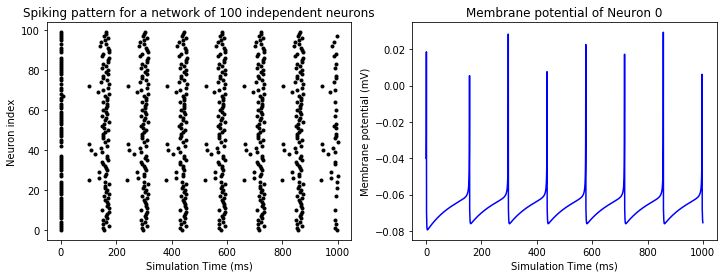

In [80]:
# Single izhikevich neuron

start_scope()

Vt=30*mV
a=0.02/ms
b=0.2/ms
c=-65*mV
d=8*mV/ms

duration=1000*ms

excitatory_neuron_eqs = '''
dv/dt=(0.04/(mV*ms))*(v**2)+(5/ms)*v+140*mV/ms-u+I : volt
du/dt=a*(b*v-u) : volt/second
I : volt/second
'''

reset = '''
v=c
u=u+d
'''

G = NeuronGroup(100,
                excitatory_neuron_eqs,
                threshold='v>=Vt',
                reset=reset,
                method='rk4')
G.I=4*mV/ms

G.v='(100*rand()-65)*mV'
G.u='-10*rand()*mV/ms'
statemon_v = StateMonitor(G, 'v', record=range(5))
statemon_u = StateMonitor(G, 'u', record=range(5))
spikemon = SpikeMonitor(G)
run(duration)

figure(figsize=(12,4))
subplot(121)
plot(spikemon.t/ms, spikemon.i, '.k')
title('Spiking pattern for a network of 100 independent neurons')
ylabel('Neuron index')
xlabel('Simulation Time (ms)')
subplot(122)
plot(statemon_v.t/ms, statemon_v.v[0], 'b')
title('Membrane potential of Neuron 0')
ylabel('Membrane potential (mV)')
xlabel('Simulation Time (ms)')
#plot(statemon_u.t/ms, statemon_u.u[0], 'r')
#for i in range(5):
#    figure(figsize=(12,4))
#    subplot(121)
#    plot(statemon_v.t/ms, statemon_v.v[i]/mV,)
#
#    subplot(122)
#    plot(statemon_u.t/ms, statemon_u.u[i]/mV)


In [5]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

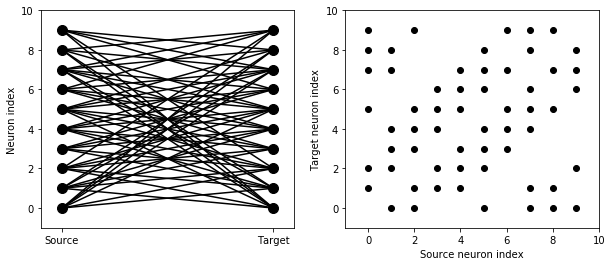

In [70]:

excitatory_neuron_eqs = '''
dv/dt=(0.04/(mV*ms))*(v**2)+(5/ms)*v+140*mV/ms-u+I : volt
du/dt=a*(b*v-u) : volt/second
I : volt/second
'''
excitatory_reset_eq = '''
v=c
u=u+d
'''
excitatory_thres_eq = 'v>=Vt'

def to_edge_list(adj_list):
    edge_list = []
    for i in range(len(adj_list)):
        if adj_list[i] == 1:
            edge_list.append(i)
    return edge_list
        


def watts_strogatz(N, k, p, eqs, thres_eq, reset_eq, method='rk4'):
    G = NeuronGroup(N, eqs, threshold=thres_eq, reset=reset_eq, method=method)
    S = Synapses(G, G)
    cij = np.zeros((N,N),dtype=int)
    for i in range(N):
        for j in range(i-k//2, i+k//2+1):
            j = j%N
            if i != j:
                cij[i,j] = 1
                cij[j,i] = 1
                
    # Only iterate upper triangular part to avoid modifying an entry twice
    for i in range(N):
        for j in range(i+1,N):
            if cij[i,j] == 1 and sample() < p:
                cij[i,j] = 0
                cij[j,i] = 0
                # Choose a random vertex in [i+1,N)
                h = np.random.randint(i+1,N)
                cij[i,h] = 1
                cij[h,i] = 1
    for i in range(N):
        S.connect(i=i,j=to_edge_list(cij[i]))
    #print(adj)
    return G, S, cij
    
[G, S, CIJ] = watts_strogatz(10, 6, 0.1, excitatory_neuron_eqs, excitatory_thres_eq, excitatory_reset_eq)
visualise_connectivity(S)

In [63]:
def mean_path_length(CIJ):
    N = length(CIJ)
    assert N == 0 or N == length(CIJ[0])
    
    path_length = np.zeros((N,N))
    
    for v in range(N):
        for u in range(N):
            if u != v:
                
    
    